In [2]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'cnn_dataset.zip')
drive.mount(MOUNTPOINT, force_remount = True)

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\ Drive/cnn_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: cnn_dataset/vehicles/5499.jpg  
  inflating: cnn_dataset/vehicles/55.jpg  
  inflating: cnn_dataset/vehicles/550.jpg  
  inflating: cnn_dataset/vehicles/5500.jpg  
  inflating: cnn_dataset/vehicles/5501.jpg  
  inflating: cnn_dataset/vehicles/5502.jpg  
  inflating: cnn_dataset/vehicles/5503.jpg  
  inflating: cnn_dataset/vehicles/5504.jpg  
  inflating: cnn_dataset/vehicles/5505.jpg  
  inflating: cnn_dataset/vehicles/5506.jpg  
  inflating: cnn_dataset/vehicles/5507.jpg  
  inflating: cnn_dataset/vehicles/5508.jpg  
  inflating: cnn_dataset/vehicles/5509.jpg  
  inflating: cnn_dataset/vehicles/551.jpg  
  inflating: cnn_dataset/vehicles/5510.jpg  
  inflating: cnn_dataset/vehicles/5511.jpg  
  inflating: cnn_dataset/vehicles/5512.jpg  
  inflating: cnn_dataset/vehicles/5513.jpg  
  inflating: cnn_dataset/vehicles/5514.jpg  
  inflating: cnn_dataset/vehicles/5515.jpg  
  inflating: cnn_dataset/vehicles/5516.jpg  
  inflat

### PART - 3 : IMPLEMENTING AND IMPROVING ALEXNET

LOADING THE DATASET

In [24]:
# Import the required libraries to load the dataset
import os
import random
import shutil
import uuid
import numpy as np

# Define the destination directories
train_directory = 'train'
val_directory = 'val'
test_directory = 'test'

# Define the paths to the source directories
classes = ['dogs', 'food', 'vehicles']

# Create the train, val and test directories if they don't already exist
for directory in [train_directory, val_directory, test_directory]:
    for class_name in classes:
        os.makedirs(os.path.join(directory, class_name), exist_ok=True)


In [5]:
# Define the training, validation and testing split ratios

train_split = 0.7
val_split = 0.15
test_split = 0.15


In [6]:
# Loop through each source directory
for class_name in classes:
    # Get the path to the current source directory
    path = os.path.join('cnn_dataset', class_name)
    
    # Get a list of all the image files in the current source directory
    image_files = [os.path.join(path, image) for image in os.listdir(path)]
    
    # Randomly shuffle the image files
    random.shuffle(image_files)
    
    # Calculate the number of images to include in the training, validation, and testing sets
    train_size = int(train_split * len(image_files))
    val_size = int(val_split * len(image_files))
    test_size = int(test_split * len(image_files))
    
    # Split the image files into training, validation, and testing sets
    train_images = image_files[:train_size]
    val_images = image_files[train_size:train_size + val_size]
    test_images = image_files[-test_size:]
    
    # Move the training images to the train directory
    for img in train_images:
        filename = str(uuid.uuid4()) + '_' + os.path.basename(img)
        final_path = os.path.join(train_directory, class_name, filename)
        shutil.copy(img, final_path)
        
    # Move the validation images to the validation directory
    for img in val_images:
        filename = str(uuid.uuid4()) + '_' + os.path.basename(img)
        final_path = os.path.join(val_directory, class_name, filename)
        shutil.copy(img, final_path)
    
    # Move the testing images to the test directory
    for img in test_images:
        filename = str(uuid.uuid4()) + '_' + os.path.basename(img)
        final_path = os.path.join(test_directory, class_name, filename)
        shutil.copy(img, final_path)

We have taken three directories train, validation and test. Created three directories representing three classes - dogs, food and vehicles inside the train, validation and test directories. The images were split in 70, 15 and 15 percentage ratios. After splitting, by using random shuffling, divided the images into training images, validation images and testing images.

PREPROCESSING THE DATASET:

In [7]:
import torch
from torchvision.transforms import transforms

# Define the data transforms for the training set
train_augmentations = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the data transforms for the validation and test sets
val_test_transformations = transforms.Compose([
    transforms.Resize(size=224),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [40]:
from torchvision.datasets import ImageFolder

# Define the datasets for the train, validation and test datasets
train_dataset = ImageFolder(root='train', transform = train_augmentations)
val_dataset = ImageFolder(root='val', transform = val_test_transformations)
test_dataset = ImageFolder(root='test', transform = val_test_transformations)


In [41]:
# Print the number of images in each set
print('Number of images in training set are ', len(train_dataset))
print('Number of images in validation set are ', len(val_dataset))
print('Number of images in testing set are ', len(test_dataset))

Number of images in training set are  21000
Number of images in validation set are  4500
Number of images in testing set are  4500


We have preprocessed our dataset after loading it using torchvision.transforms method where we rotated the image randomly by a maximum angle of 20 degrees, randomly flipped images horizontally, resized the images to 224 size, converted them to tensors and finally scaled the images. After this we have then converted the datasets to dataloaders by using torch.utils.data Dataloader using batch size 128. We can also observe that we have 21000 images for training set, 4500 images for validation and testing sets.

VISUALIZATIONS ON THE DATASET

In [33]:
import matplotlib.pyplot as plt

# Extracting the image randomly from the test dataset
image = test_dataset[10][0]


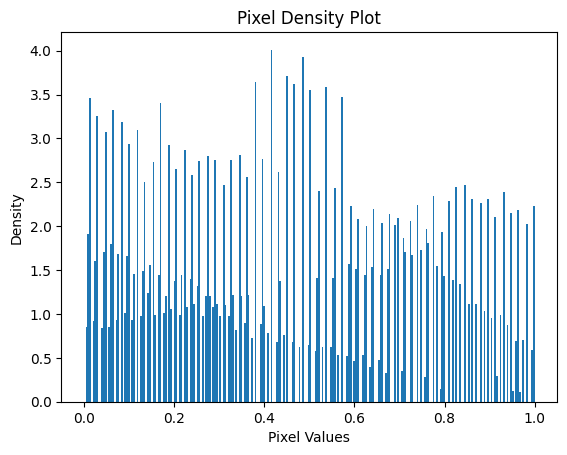

In [34]:
# Pixel density graph
plt.hist(image.view(-1), bins = 256,  density = True, range = (0, 1))

plt.xlabel("Pixel Values")
plt.ylabel("Density")

plt.title("Pixel Density Plot")

plt.show()

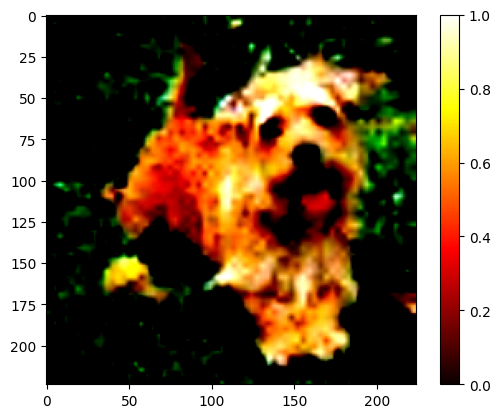

In [35]:
# Heatmap for the pixel values in an image

plt.imshow(image.permute(1, 2, 0), cmap = 'hot')

plt.colorbar()
plt.show()

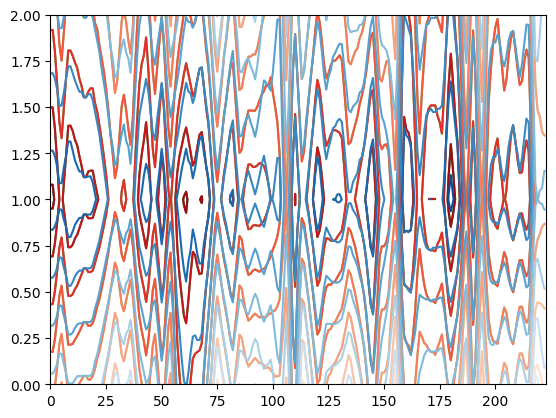

In [39]:
# Representing Contour plot to better understand the shape and structure of the image

plt.contour(image[:,:,0], cmap = 'Greens')
plt.contour(image[:,:,1], cmap = 'Reds')
plt.contour(image[:,:,2], cmap = 'Blues')

plt.show()


In [42]:
from torch.utils.data import DataLoader

# Define the loaders for the train, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 128, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 128, shuffle = False)


DEFINING ALEXNET MODEL

In [48]:
import torch.nn as nn

class MyAlexNet(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.features = nn.Sequential(
      nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 11, stride = 4),
      nn.ReLU(),
      nn.LocalResponseNorm(size = 5, alpha = 0.0001, beta = 0.75, k = 2),
      nn.MaxPool2d(kernel_size = 3, stride = 2),
      nn.Conv2d(64, 192, kernel_size = 5, padding = 2),
      nn.ReLU(),
      nn.LocalResponseNorm(size = 5, alpha = 0.0001, beta = 0.75, k = 2),
      nn.MaxPool2d(kernel_size = 3, stride = 2),
      nn.Conv2d(192, 384, kernel_size = 3, padding = 1),
      nn.ReLU(),
      nn.Conv2d(384, 256, kernel_size = 3, padding = 1),
      nn.ReLU(),
      nn.Conv2d(256, 256, kernel_size = 3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size = 3, stride = 2),)

    # Down sampling the input tensor to a fixed image size
    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

    self.classifier = nn.Sequential(
      nn.Dropout(),
      nn.Linear(in_features = (256 * 6 * 6), out_features = 4096),
      nn.ReLU(inplace = True),
      nn.Dropout(),
      nn.Linear(in_features = 4096, out_features = 4096),
      nn.ReLU(inplace = True),
      nn.Linear(in_features = 4096, out_features = 3),
    )

  def forward(self, m):
    m = self.features(m)
    m = self.avgpool(m)
    m = torch.flatten(m, 1)
    return self.classifier(m)

TRAINING THE MODEL

In [49]:
# Defining the device to pass for the training model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [50]:
from tqdm.auto import tqdm

def train_model(model, device, epochs, optimizer, loss_fun, train_loader, validation_loader, test_loader):

    # Initializing training loss, training accuracy list
    train_loss_vals = []
    train_accuracy_vals = []

    # Initializing validation loss, validation accuracy list
    validation_loss_vals = []
    validation_accuracy_vals = []

    # Initializing testing loss, testing accuracy list
    test_loss_vals = []
    test_accuracy_vals = []

    # Define the loss function and optimizer
    criterion = loss_fun
    optimizer = optimizer

    # Train the model for the specified number of epochs
    for epoch in range(epochs):
        
        # Set the model to training mode
        model.train()

        # Initializing training accuracy, validation accuracy
        train_accuracy = 0
        validation_accuracy = 0

        # Initializing training loss, validation loss for computations
        train_loss = 0
        validation_loss = 0

        # Initializing variables for test accuracy, test loss
        test_loss = 0
        test_accuracy = 0

        #Initialize variables for calculating train, validation and test accuracy
        train_correct = 0
        train_total = 0

        val_correct = 0
        val_total = 0

        test_correct = 0
        test_total = 0

        # Looping train_loader using tqdm
        for pred_vals, true_vals in tqdm(train_loader):

            # Convert these pred_vals, true_vals to device to be compatible
            pred_vals = pred_vals.to(device)
            true_vals = true_vals.to(device)

            optimizer.zero_grad()

            # Passing the pred_vals to the model
            result = model(pred_vals)

            # Finding the loss value by using criterion method
            loss_vals = criterion(result, true_vals)

            loss_vals.backward()

            # Updating the weights
            optimizer.step()

            # FInding the loss from the loss_vals variable
            train_loss += loss_vals.item()*pred_vals.size(0)

            # Finding the training accuracy by first computing prediction classes and total classes
            predicted_classes = torch.argmax(result, dim=1)

            train_correct += torch.sum(predicted_classes == true_vals).item()
            train_total += len(true_vals)

        # Calculate the training accuracy
        train_accuracy = (train_correct / train_total)

        with torch.no_grad():

            for pred_vals, true_vals in validation_loader:

                # Move prediction values and true values to the same device as model
                pred_vals = pred_vals.to(device)
                true_vals = true_vals.to(device)

                result = model(pred_vals)

                # Finding the validation loss
                validation_loss += loss_vals.item()*pred_vals.size(0)

                predicted_classes = torch.argmax(result, dim=1)

                val_correct += torch.sum(predicted_classes == true_vals).item()
                val_total += len(true_vals)

            # Calculate the validation accuracy
            validation_accuracy = (val_correct/val_total)

            for pred_vals, true_vals in test_loader:
            
              # Move prediction values and true values to the same device as model
              pred_vals = pred_vals.to(device)
              true_vals = true_vals.to(device)

              result = model(pred_vals)

              # Find the test loss value by using criterion method
              loss_vals = criterion(result, true_vals)

              predicted_classes = torch.argmax(result, dim=1)
              test_correct += torch.sum(predicted_classes == true_vals).item()

              test_total += len(true_vals)
              
            test_accuracy = test_correct/test_total

        train_loss = train_loss/len(train_loader.dataset)
        validation_loss = validation_loss / len(val_loader.dataset)

        # Appending the losses and accuracy to the list variables initialized before
        train_loss_vals.append(train_loss)
        train_accuracy_vals.append(train_accuracy)

        validation_loss_vals.append(validation_loss)
        validation_accuracy_vals.append(validation_accuracy)

        test_accuracy_vals.append(test_accuracy)

        print('Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch {} are {:.3f}, {:.3f}, {:.3f}, {:.3f} and, {:.3f}'.format(epoch + 1, train_loss, validation_loss, train_accuracy*100, validation_accuracy*100, test_accuracy*100))

    return model, train_loss_vals, validation_loss_vals, train_accuracy_vals, validation_accuracy_vals, test_accuracy_vals      


In [51]:
# Executing the AlexNet model
model = MyAlexNet().to(device)

# Using CrossEntropy Loss and Adam optimizer for best accuracy
epochs = 20
learning_rate = 1e-4
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

model, train_loss_vals, validation_loss_vals, train_accuracy_vals, validation_accuracy_vals, test_accuracy_vals = train_model(model, device, epochs, optimizer, loss_fun, train_loader, val_loader, test_loader)

  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 1 are 0.680, 0.366, 70.000, 79.578 and, 79.289


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 2 are 0.525, 0.431, 78.643, 82.400 and, 82.467


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 3 are 0.478, 0.709, 81.014, 85.156 and, 84.689


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 4 are 0.429, 0.596, 83.224, 87.578 and, 86.844


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 5 are 0.413, 0.215, 83.786, 86.378 and, 85.422


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 6 are 0.403, 0.054, 84.224, 85.844 and, 85.844


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 7 are 0.380, 0.139, 85.090, 89.156 and, 89.200


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 8 are 0.367, 0.226, 85.962, 85.511 and, 84.422


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 9 are 0.353, 0.136, 86.286, 84.911 and, 85.089


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 10 are 0.337, 0.321, 86.752, 88.622 and, 87.933


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 11 are 0.326, 0.624, 87.633, 88.067 and, 88.267


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 12 are 0.329, 1.312, 87.281, 90.178 and, 90.444


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 13 are 0.335, 0.220, 86.995, 91.111 and, 90.667


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 14 are 0.302, 0.217, 88.233, 86.489 and, 86.644


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 15 are 0.292, 0.028, 88.967, 90.333 and, 89.933


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 16 are 0.290, 0.058, 88.905, 91.156 and, 89.978


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 17 are 0.280, 0.238, 89.152, 91.289 and, 91.089


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 18 are 0.279, 0.132, 89.343, 91.022 and, 91.022


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 19 are 0.272, 0.390, 89.738, 92.022 and, 91.778


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 20 are 0.261, 0.008, 90.138, 92.533 and, 92.778


In [52]:
# Evaluate the performance of the model

test_accuracy = test_accuracy_vals[len(test_accuracy_vals) - 1]

print('Test accuracy for model using Adam optimizier and Cross Entropy loss function is {:.3f}'.format(test_accuracy*100))

Test accuracy for model using Adam optimizier and Cross Entropy loss function is 92.778


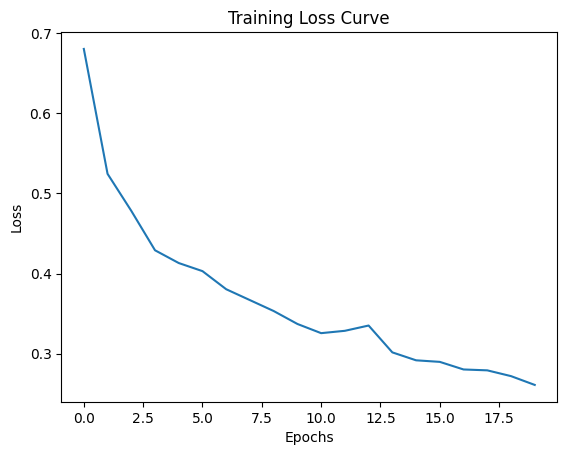

In [53]:
# Visualization graphs

# Graph representing training loss for 20 epochs

plt.plot(train_loss_vals, label = 'Training Loss')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Providing the title for grah
plt.title('Training Loss Curve')

plt.show()

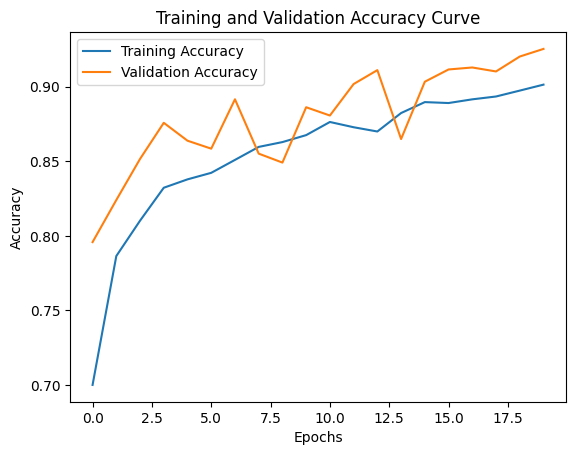

In [85]:
# Graph representing training accuracy and validation accuracy for 20 epochs
plt.plot(train_accuracy_vals, label = 'Training Accuracy')
plt.plot(validation_accuracy_vals, label = 'Validation Accuracy')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Validation Accuracy Curve')

plt.legend()

plt.show()

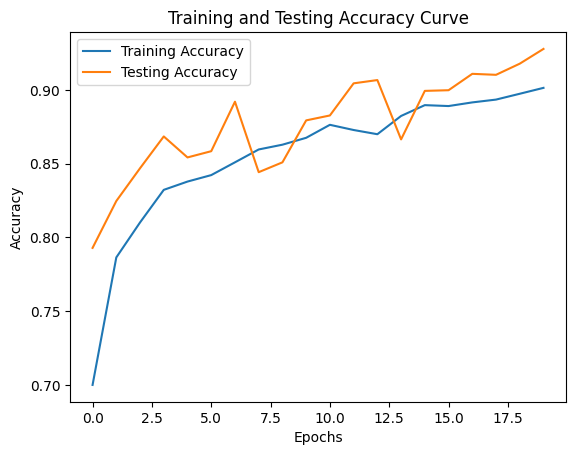

In [54]:
# Graph representing training accuracy and testing accuracy for 20 epochs
plt.plot(train_accuracy_vals, label = 'Training Accuracy')
plt.plot(test_accuracy_vals, label = 'Testing Accuracy')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Testing Accuracy Curve')

plt.legend()

plt.show()

We have received good accuracy approximately equal to 92.7 but to increase and improve the model, we have modified the hyperparameters such as the learning rate, epochs, optimizers and calculated the test accuracy.

In [58]:
# Executing the AlexNet model

# Modifying the optimizer to SGD method
model_2 = MyAlexNet().to(device)

epochs = 20
learning_rate = 1e-2
loss_fun = nn.CrossEntropyLoss()
optimizer_2 = torch.optim.SGD(model_2.parameters(), lr = learning_rate)

model_2, train_loss_vals2, validation_loss_vals2, train_accuracy_vals2, validation_accuracy_vals2, test_accuracy_vals2 = train_model(model_2, device, epochs, optimizer_2, loss_fun, train_loader, val_loader, test_loader)

  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 1 are 1.098, 1.100, 34.519, 34.511 and, 34.511


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 2 are 1.098, 1.097, 35.700, 34.244 and, 34.800


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 3 are 1.097, 1.094, 38.800, 33.711 and, 34.067


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 4 are 1.094, 1.099, 38.471, 34.644 and, 35.133


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 5 are 1.062, 0.975, 42.471, 46.533 and, 47.356


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 6 are 0.907, 0.770, 59.505, 58.400 and, 59.733


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 7 are 0.837, 0.696, 63.005, 63.378 and, 64.511


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 8 are 0.773, 0.569, 64.248, 51.489 and, 52.022


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 9 are 0.749, 0.773, 66.314, 55.978 and, 57.222


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 10 are 0.734, 0.539, 67.386, 64.622 and, 66.178


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 11 are 0.716, 0.782, 68.157, 66.044 and, 67.222


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 12 are 0.706, 0.442, 68.686, 70.111 and, 71.333


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 13 are 0.692, 0.900, 69.467, 54.822 and, 55.867


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 14 are 0.680, 0.496, 70.300, 73.889 and, 74.911


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 15 are 0.654, 0.559, 71.781, 66.467 and, 66.933


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 16 are 0.630, 0.440, 73.405, 62.000 and, 61.867


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 17 are 0.585, 0.298, 75.614, 68.689 and, 68.733


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 18 are 0.559, 0.289, 77.090, 81.222 and, 82.089


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 19 are 0.541, 0.193, 77.990, 81.956 and, 81.489


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 20 are 0.533, 0.404, 78.419, 77.867 and, 78.644


In [59]:
# Evaluate the performance of the model

test_accuracy2 = test_accuracy_vals2[len(test_accuracy_vals2) - 1]

print('Test accuracy for model using SGD optimizier and Cross Entropy loss function is {:.3f}'.format(test_accuracy2*100))

Test accuracy for model using SGD optimizier and Cross Entropy loss function is 78.644


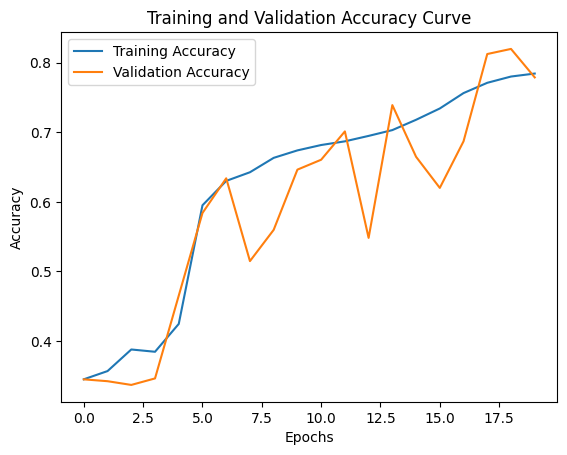

In [86]:
# Graph representing training accuracy and validation accuracy for 20 epochs
plt.plot(train_accuracy_vals2, label = 'Training Accuracy')
plt.plot(validation_accuracy_vals2, label = 'Validation Accuracy')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Validation Accuracy Curve')

plt.legend()

plt.show()

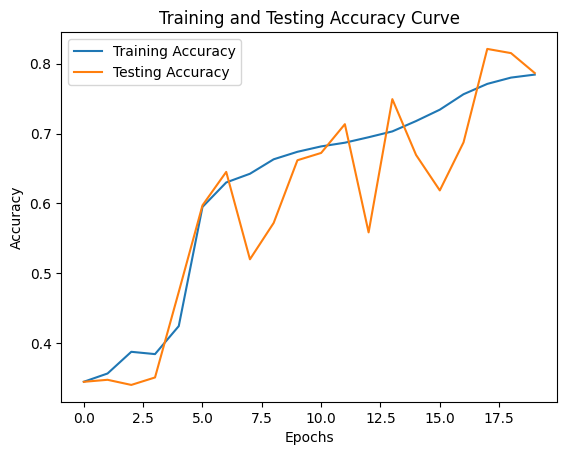

In [87]:
# Graph representing training accuracy and testing accuracy for 20 epochs
plt.plot(train_accuracy_vals2, label = 'Training Accuracy')
plt.plot(test_accuracy_vals2, label = 'Testing Accuracy')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Testing Accuracy Curve')

plt.legend()

plt.show()

Model using SGD optimizer has decreased our accuracy, so we have used Adagrad optimizer to improve our accuracy.

In [61]:
# Executing the AlexNet model

# Modifying the optimizer to Adagrad and increasing the learning as well
model_3 = MyAlexNet().to(device)

epochs = 20
learning_rate_3 = 1e-2
loss_fun = nn.CrossEntropyLoss()
optimizer_3 = torch.optim.Adagrad(model_3.parameters(), lr = learning_rate_3)

model_3, train_loss_vals3, validation_loss_vals3, train_accuracy_vals3, validation_accuracy_vals3, test_accuracy_vals3 = train_model(model_3, device, epochs, optimizer, loss_fun, train_loader, val_loader, test_loader)

  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 1 are 1.099, 1.092, 33.319, 33.333 and, 33.267


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 2 are 1.099, 1.103, 33.314, 33.333 and, 33.311


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 3 are 1.099, 1.100, 33.319, 33.311 and, 33.400


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 4 are 1.099, 1.099, 33.295, 33.200 and, 33.311


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 5 are 1.099, 1.094, 33.300, 33.333 and, 33.289


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 6 are 1.099, 1.098, 33.300, 33.378 and, 33.267


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 7 are 1.099, 1.098, 33.329, 33.333 and, 33.422


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 8 are 1.099, 1.100, 33.314, 33.333 and, 33.333


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 9 are 1.099, 1.099, 33.333, 33.333 and, 33.311


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 10 are 1.099, 1.099, 33.314, 33.289 and, 33.356


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 11 are 1.099, 1.097, 33.348, 33.356 and, 33.267


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 12 are 1.099, 1.099, 33.324, 33.378 and, 33.311


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 13 are 1.099, 1.100, 33.300, 33.267 and, 33.333


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 14 are 1.099, 1.101, 33.319, 33.244 and, 33.333


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 15 are 1.099, 1.102, 33.338, 33.289 and, 33.311


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 16 are 1.099, 1.097, 33.329, 33.289 and, 33.311


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 17 are 1.099, 1.098, 33.343, 33.333 and, 33.400


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 18 are 1.099, 1.100, 33.290, 33.311 and, 33.311


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 19 are 1.099, 1.101, 33.333, 33.311 and, 33.289


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 20 are 1.099, 1.099, 33.310, 33.378 and, 33.311


In [62]:
# Calculating the test accuracy

test_accuracy3 = test_accuracy_vals3[len(test_accuracy_vals3) - 1]

print('Test accuracy for model using Adagrad optimizier and Cross Entropy loss function is {:.3f}'.format(test_accuracy3*100))

Test accuracy for model using Adagrad optimizier and Cross Entropy loss function is 33.311


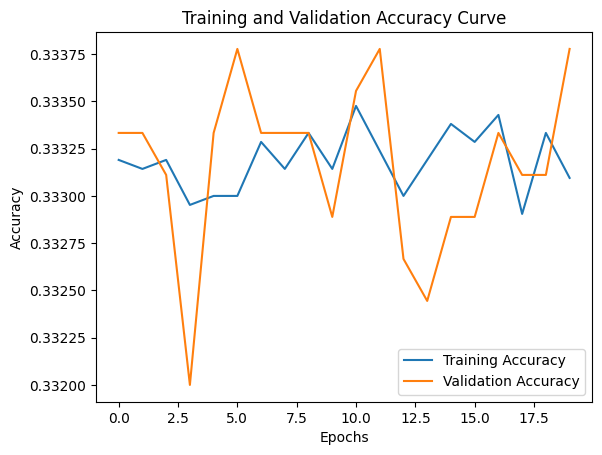

In [89]:
# Graph representing training accuracy and validation accuracy for 20 epochs
plt.plot(train_accuracy_vals3, label = 'Training Accuracy')
plt.plot(validation_accuracy_vals3, label = 'Validation Accuracy')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Validation Accuracy Curve')

plt.legend()

plt.show()

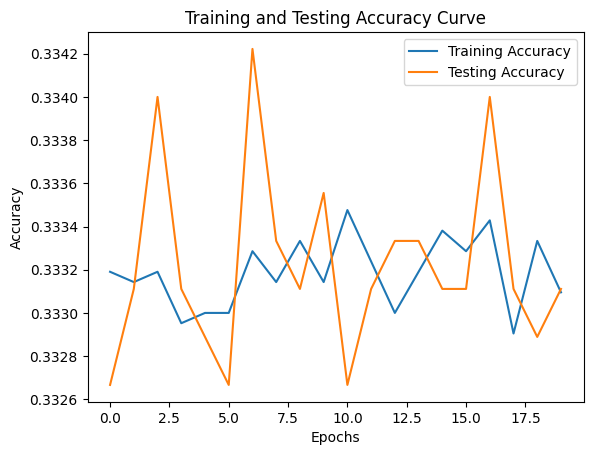

In [88]:
# Graph representing training accuracy and testing accuracy for 20 epochs
plt.plot(train_accuracy_vals3, label = 'Training Accuracy')
plt.plot(test_accuracy_vals3, label = 'Testing Accuracy')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Testing Accuracy Curve')

plt.legend()

plt.show()

Using Adagrad optimizer, our accuracy went down really bad so we have used batch normalization to our model.

PERFORMING BATCH NORMALIZATION TO THE EXISTING ALEXNET MODEL

In [63]:
import torch.nn as nn

class MyAlexNet_BatchNN(nn.Module):
  
  def __init__(self):
      
    super().__init__()

    self.features = nn.Sequential(
        
        nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 11, stride = 4),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.LocalResponseNorm(size = 5, alpha = 0.0001, beta = 0.75, k = 2),
        nn.MaxPool2d(kernel_size = 3, stride = 2),
        nn.Conv2d(64, 192, kernel_size = 5, padding = 2),
        nn.BatchNorm2d(192),
        nn.ReLU(),
        nn.LocalResponseNorm(size = 5, alpha = 0.0001, beta = 0.75, k = 2),
        nn.MaxPool2d(kernel_size = 3, stride = 2),
        nn.Conv2d(192, 384, kernel_size = 3, padding = 1),
        nn.BatchNorm2d(384),
        nn.ReLU(),
        nn.Conv2d(384, 256, kernel_size = 3, padding = 1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size = 3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride = 2),
    )

    # Down sampling the input tensor to a fixed image size
    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

    self.classifier = nn.Sequential(
        nn.Dropout(),
        nn.Linear(in_features = (256 * 6 * 6), out_features = 4096),
        nn.BatchNorm1d(4096),
        nn.ReLU(inplace = True),
        nn.Dropout(),
        nn.Linear(in_features = 4096, out_features = 4096),
        nn.BatchNorm1d(4096),
        nn.ReLU(inplace = True),
        nn.Linear(in_features = 4096, out_features = 3),
    )

  def forward(self, m):
      m = self.features(m)
      m = self.avgpool(m)
      m = torch.flatten(m, 1)
      return self.classifier(m)


In [64]:
# Executing the AlexNet model

# Modifying the optimizer to SGD method
model_4 = MyAlexNet_BatchNN().to(device)

epochs = 20
learning_rate = 1e-4
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr = learning_rate)

model_4, train_loss_vals4, validation_loss_vals4, train_accuracy_vals4, validation_accuracy_vals4, test_accuracy_vals4 = train_model(model_4, device, epochs, optimizer, loss_fun, train_loader, val_loader, test_loader)

  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 1 are 0.576, 0.863, 76.524, 84.000 and, 36.889


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 2 are 0.455, 1.214, 82.019, 86.200 and, 37.067


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 3 are 0.422, 0.521, 83.376, 87.422 and, 36.733


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 4 are 0.393, 0.604, 84.543, 87.267 and, 37.178


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 5 are 0.383, 0.501, 84.843, 89.000 and, 36.622


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 6 are 0.354, 0.208, 86.105, 88.244 and, 37.889


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 7 are 0.351, 0.171, 86.457, 89.667 and, 36.378


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 8 are 0.324, 0.619, 87.576, 90.178 and, 36.956


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 9 are 0.332, 0.393, 87.586, 90.733 and, 38.400


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 10 are 0.312, 1.849, 87.752, 89.422 and, 36.378


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 11 are 0.317, 0.376, 87.986, 91.044 and, 36.511


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 12 are 0.301, 0.490, 88.395, 90.200 and, 38.156


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 13 are 0.305, 0.176, 88.152, 91.556 and, 37.400


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 14 are 0.285, 0.055, 89.019, 92.267 and, 38.267


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 15 are 0.282, 1.140, 88.971, 88.778 and, 37.289


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 16 are 0.322, 0.025, 87.557, 91.600 and, 37.867


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 17 are 0.272, 0.509, 89.638, 92.000 and, 38.467


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 18 are 0.277, 0.282, 89.567, 91.711 and, 37.489


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 19 are 0.261, 2.257, 90.071, 92.111 and, 37.800


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, Validation accuracy and, Testing accuracy for epoch 20 are 0.283, 1.255, 89.048, 92.533 and, 38.089


In [65]:
# Calculating the test accuracy

test_accuracy_batchnn = test_accuracy_vals4[len(test_accuracy_vals4) - 1]

print('Test accuracy after applying batch normalization to the Alexnet model is {:.3f}'.format(test_accuracy_batchnn*100))

Test accuracy after applying batch normalization to the Alexnet model is 38.089


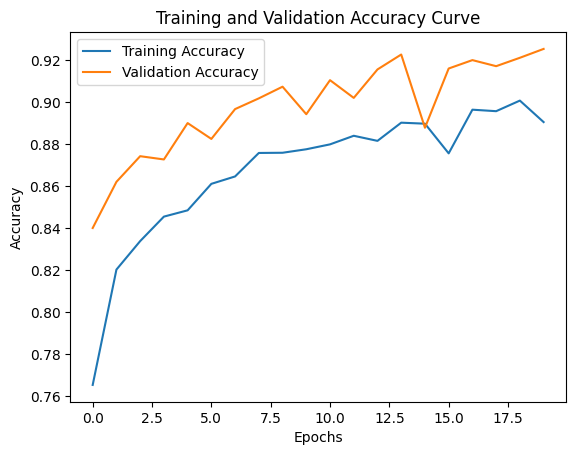

In [90]:
# Graph representing training accuracy and validation accuracy for 20 epochs
plt.plot(train_accuracy_vals4, label = 'Training Accuracy')
plt.plot(validation_accuracy_vals4, label = 'Validation Accuracy')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Validation Accuracy Curve')

plt.legend()

plt.show()

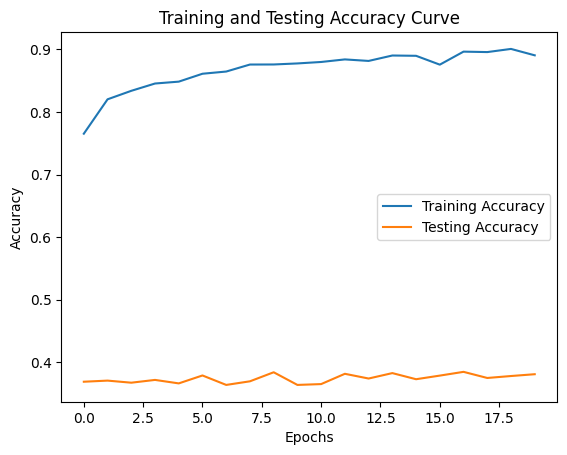

In [91]:
# Graph representing training accuracy and testing accuracy for 20 epochs
plt.plot(train_accuracy_vals4, label = 'Training Accuracy')
plt.plot(test_accuracy_vals4, label = 'Testing Accuracy')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Testing Accuracy Curve')

plt.legend()

plt.show()

The model was underfitting when used batch normalization on the model, so we moved to early stopping to see if there is any improvement on the model.

EARLYSTOPPING

In [92]:
# Modifying the training method to include early stopping

from tqdm.auto import tqdm

def train_model_earlystopping(model, device, epochs, optimizer, loss_fun, train_loader, validation_loader, test_loader):

    # Initializing training loss, training accuracy list
    train_loss_vals = []
    train_accuracy_vals = []

    # Initializing validation loss, validation accuracy list
    validation_loss_vals = []
    validation_accuracy_vals = []

    # Initializing test accuracy list
    test_accuracy_vals = []

    # Define the loss function and optimizer
    criterion = loss_fun
    optimizer = optimizer

    # Defining the best validation loss and patience
    best_validation_loss = float('inf')
    patience = 10

    # Train the model for the specified number of epochs
    for epoch in range(epochs):
        
        # Set the model to training mode
        model.train()

        # Initializing training accuracy, validation accuracy
        train_accuracy = 0
        validation_accuracy = 0

        # Initializing training loss, validation loss for computations
        train_loss = 0
        validation_loss = 0

        #Initialize variables for calculating train, validation and test accuracy
        train_correct = 0
        train_total = 0

        val_correct = 0
        val_total = 0

        test_correct = 0
        test_total = 0

        # Initializing testing accuracy
        test_accuracy = 0

        # Loop over the training set in batches
        for pred_vals, true_vals in tqdm(train_loader):

            # Convert these pred_vals, true_vals to device to be compatible
            pred_vals = pred_vals.to(device)
            true_vals = true_vals.to(device)

            optimizer.zero_grad()

            # Passing the predicted values to the model
            result = model(pred_vals)

            # Finding the loss value using criterion method
            loss_vals = criterion(result, true_vals)

            loss_vals.backward()

            # Calculating the weights using step() method for the optimizer
            optimizer.step()

            # Calculating the training loss
            train_loss += loss_vals.item()*pred_vals.size(0)

            predicted_classes = torch.argmax(result, dim=1)
            train_correct += torch.sum(predicted_classes == true_vals).item()

            train_total += len(true_vals)

        # Calculate the training accuracy which is calculated by dividing correct values to the total number of values
        train_accuracy = (train_correct / train_total)

        with torch.no_grad():

            for pred_vals, true_vals in validation_loader:

                # Move prediction values and true values to the same device as model
                pred_vals = pred_vals.to(device)
                true_vals = true_vals.to(device)

                result = model(pred_vals)

                # Finding the validation loss
                validation_loss += loss_vals.item()*pred_vals.size(0)

                predicted_classes = torch.argmax(result, dim=1)
                val_correct += torch.sum(predicted_classes == true_vals).item()

                val_total += len(true_vals)

            # Calculate the validation accuracy
            validation_accuracy = (val_correct/val_total)

            best_validation_loss = validation_loss if validation_loss < best_validation_loss else best_validation_loss
            patience_counter = 0 if validation_loss < best_validation_loss else patience_counter + 1

            if patience_counter >= patience:
              break

        for pred_vals, true_vals in test_loader:
            
          # Move prediction values and true values to the same device as model
          pred_vals = pred_vals.to(device)
          true_vals = true_vals.to(device)

          result = model(pred_vals)

          predicted_classes = torch.argmax(result, dim=1)
          test_correct += torch.sum(predicted_classes == true_vals).item()
          test_total += len(true_vals)
        
        test_accuracy = test_correct/test_total

        train_loss = train_loss/len(train_loader.dataset)
        validation_loss = validation_loss / len(val_loader.dataset)

        # Appending all the calculated values to the lists initialized
        train_loss_vals.append(train_loss)
        train_accuracy_vals.append(train_accuracy)

        validation_loss_vals.append(validation_loss)
        validation_accuracy_vals.append(validation_accuracy)

        test_accuracy_vals.append(test_accuracy)

        print('Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch {} are {:.3f}, {:.3f}, {:.3f} and, {:.3f}'.format(epoch + 1, train_loss, validation_loss, train_accuracy*100, validation_accuracy*100))

    return model, train_loss_vals, validation_loss_vals, train_accuracy_vals, validation_accuracy_vals, test_accuracy_vals   


In [93]:
def evaluate_performance_earlystopping(model, test_laoder):

  test_correct = 0
  test_total = 0

  test_accuracy_vals = []

  for pred_vals, true_vals in test_loader:
            
    # Move prediction values and true values to the same device as model
    pred_vals = pred_vals.to(device)
    true_vals = true_vals.to(device)

    result = model(pred_vals)

    predicted_classes = torch.argmax(result, dim=1)

    test_correct += torch.sum(predicted_classes == true_vals).item()
    
    test_total += len(true_vals)
    
  test_accuracy = test_correct/test_total

  return test_accuracy

In [94]:
# Executing the AlexNet model for early stopping
model_5 = MyAlexNet().to(device)

epochs = 25
learning_rate = 1e-4
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_5.parameters(), lr = learning_rate)

model_5, train_loss_vals5, validation_loss_vals5, train_accuracy_vals5, validation_accuracy_vals5, test_accuracy_vals5 = train_model_earlystopping(model_5, device, epochs, optimizer, loss_fun, train_loader, val_loader, test_loader)

  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 1 are 0.699, 0.507, 68.862 and, 81.600


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 2 are 0.513, 0.334, 79.281 and, 85.467


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 3 are 0.471, 0.297, 81.076 and, 84.311


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 4 are 0.422, 0.636, 83.362 and, 83.911


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 5 are 0.412, 0.840, 83.824 and, 84.378


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 6 are 0.398, 0.262, 84.310 and, 86.911


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 7 are 0.377, 0.291, 85.052 and, 89.200


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 8 are 0.352, 0.527, 86.205 and, 88.644


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 9 are 0.350, 0.335, 86.286 and, 87.222


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 10 are 0.341, 0.286, 86.657 and, 89.778


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 11 are 0.332, 0.043, 87.138 and, 90.644


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 12 are 0.321, 0.335, 87.529 and, 88.111


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 13 are 0.318, 0.068, 87.681 and, 90.378


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 14 are 0.294, 0.418, 88.476 and, 89.422


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 15 are 0.291, 0.510, 88.800 and, 85.778


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 16 are 0.296, 0.043, 88.624 and, 90.778


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 17 are 0.287, 0.585, 88.686 and, 90.689


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 18 are 0.287, 0.235, 89.038 and, 87.733


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 19 are 0.274, 0.202, 89.438 and, 91.356


  0%|          | 0/165 [00:00<?, ?it/s]

Training loss, Validation Loss, Training accuracy, and Validation accuracy for epoch 20 are 0.270, 0.376, 89.648 and, 91.800


  0%|          | 0/165 [00:00<?, ?it/s]

In [95]:
# Finding the test accuracy using earlystopping

test_accuracy_earlystopping = evaluate_performance_earlystopping(model_5, test_loader)

print('Test accuracy after applying early stopping to the Alexnet model is {:.3f}'.format(test_accuracy_earlystopping*100))

Test accuracy after applying early stopping to the Alexnet model is 90.956


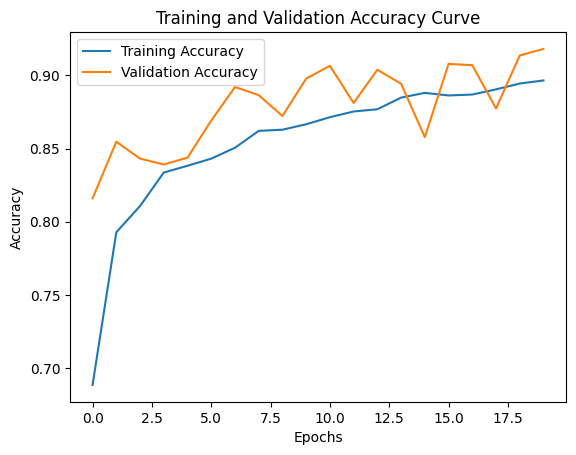

In [96]:
# Graph representing training accuracy and validation accuracy for 20 epochs
plt.plot(train_accuracy_vals5, label = 'Training Accuracy')
plt.plot(validation_accuracy_vals5, label = 'Validation Accuracy')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Validation Accuracy Curve')

plt.legend()

plt.show()

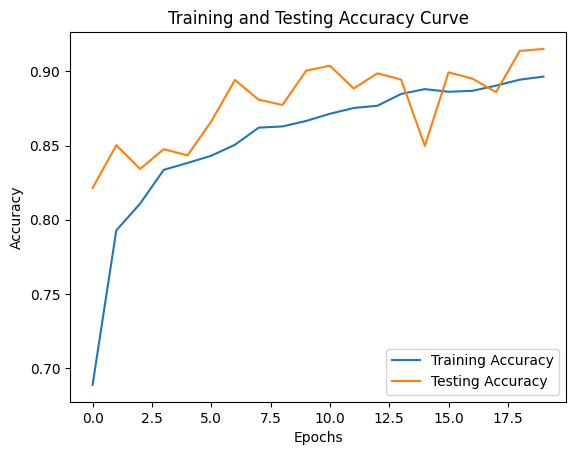

In [97]:
# Graph representing training accuracy and testing accuracy for 20 epochs
plt.plot(train_accuracy_vals5, label = 'Training Accuracy')
plt.plot(test_accuracy_vals5, label = 'Testing Accuracy')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Testing Accuracy Curve')

plt.legend()

plt.show()

We got very good accuracy 90.956 using early stopping but not the best accuracy. So, we have considered our model with learning rate equal to 1e-4 with 20 epochs, using CrossEntropyLoss loss function and Adam optimizer as our best model.

### PART -4 : OPTIMIZING CNN + DATA AUGMENTATION

In [ ]:
# Loading the dataset from SHVN library
import torch
from torchvision.datasets import SVHN
from torchvision.transforms import ToTensor

# Load the SVHN dataset
train_dataset = SVHN(root='./data', split='train', transform = ToTensor(), download = True)
test_dataset = SVHN(root='./data', split='test', transform = ToTensor(), download = True)

100%|██████████| 182040794/182040794 [00:14<00:00, 12488977.45it/s]


100%|██████████| 64275384/64275384 [00:08<00:00, 7906374.56it/s] 


In [ ]:
from torch.utils.data import DataLoader

# Creating train loader using train dataset
train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True)

In [ ]:
# Creating test loader using test dataset
test_loader = DataLoader(test_dataset, batch_size = 128, shuffle = False)

PERFORMING VISUALIZATIONS ON THE SHVN DATASET BEFORE AUGMENTATIONS

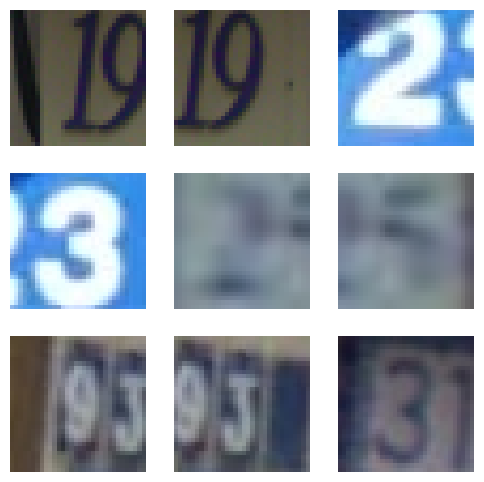

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (6, 6))

for i, ax in enumerate(axes.flat):
    image = train_dataset[i][0]
    ax.imshow(image.permute(1,2,0))
    ax.axis('off')

plt.show()


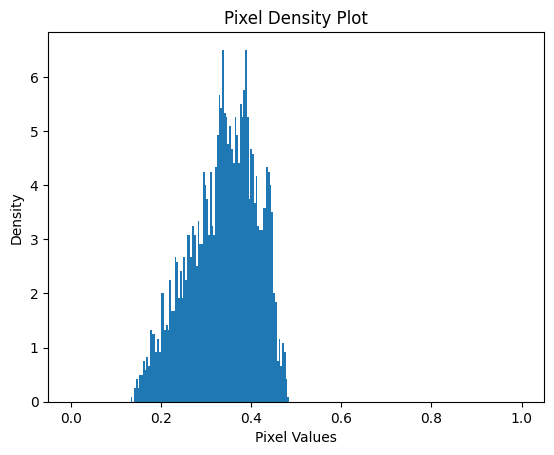

In [ ]:
# Performing Pixel Density plot for a random image on the training dataset

image = train_dataset[10][0]

plt.hist(image.view(-1), bins = 256, density = True, range = (0,1))

plt.xlabel("Pixel Values")
plt.ylabel("Density")

plt.title("Pixel Density Plot")

plt.show()

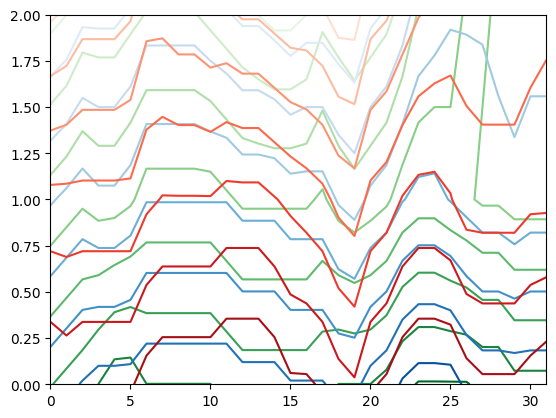

In [ ]:
# Contour plot to better understand the structure of the image

plt.contour(image[:, :, 0], cmap = "Greens")
plt.contour(image[:, :, 1], cmap = "Blues")
plt.contour(image[:, :, 2], cmap = "Reds")

plt.show()

In [ ]:
import torch.nn as nn

class MyAlexNet_SHVN(nn.Module):
  
    def __init__(self):
      
        super().__init__()

        # Reducing the kernel sizes to fit to the dataset
        # Modifing the output layer classes to 10
        self.features = nn.Sequential(
            
            nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 5),
            nn.ReLU(),
            nn.LocalResponseNorm(size = 5, alpha = 0.0001, beta = 0.75, k = 2),
            nn.MaxPool2d(kernel_size = 2),
            nn.Conv2d(64, 192, kernel_size = 3),
            nn.ReLU(),
            nn.LocalResponseNorm(size = 5, alpha = 0.0001, beta = 0.75, k = 2),
            nn.MaxPool2d(kernel_size = 2),
            nn.Conv2d(192, 384, kernel_size = 3),
            nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size = 1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
        )

        # Down sampling the input tensor to a fixed image size
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(in_features = (256 * 6 * 6), out_features = 4096),
            nn.ReLU(inplace = True),
            nn.Dropout(),
            nn.Linear(in_features = 4096, out_features = 4096),
            nn.ReLU(inplace = True),
            nn.Linear(in_features = 4096, out_features = 10),
        )

    def forward(self, m):
        m = self.features(m)
        m = self.avgpool(m)
        m = torch.flatten(m, 1)
        return self.classifier(m)

In [ ]:
# Executing the AlexNet model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_shvn = MyAlexNet_SHVN().to(device)

In [ ]:
from tqdm.auto import tqdm

def train_model(model, epochs, optimizer, loss_fun, train_loader, test_loader):

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # Initializing training loss, training accuracy list
  train_loss_vals = []
  train_accuracy_vals = []

  # Initializing testing loss, testing accuracy list
  test_loss_vals = []
  test_accuracy_vals = []

  # Define the loss function and optimizer
  criterion = loss_fun
  optimizer = optimizer

  # Train the model for the specified number of epochs
  for epoch in range(epochs):

      # Set the model to training mode
      model.train()

      # Initializing actual values to zero to compute training accuracy
      actual_train_val = 0
      actual_test_val = 0

      # Initializing training loss for computations
      train_loss = 0

      # Initializing testing loss for computations
      test_loss = 0

      # Loop over the training set in batches
      for pred_vals, true_vals in tqdm(train_loader):

        # Convert these pred_vals, true_vals to device to be compatible
        pred_vals = pred_vals.to(device)
        true_vals = true_vals.to(device)

        optimizer.zero_grad()

        # Pass the predicted values to the model
        result = model(pred_vals)

        # Find the training loss using criterion method
        loss_vals = criterion(result, true_vals)

        loss_vals.backward()

        # Find the weights using step() method
        optimizer.step()

        train_loss += loss_vals.item()*pred_vals.size(0)

        # Computing the training accuracy
        max_val = torch.argmax(result, dim = 1)
        actual_train_val += torch.eq(max_val, true_vals).sum().item()

      train_loss = train_loss/len(train_loader.dataset)
      actual_train_val = actual_train_val/len(train_loader.dataset)

      train_loss_vals.append(train_loss)
      train_accuracy_vals.append(actual_train_val)

      # Set the model to evaluation model
      model.eval()

      with torch.no_grad():

        for pred_vals, true_vals in test_loader:
            
            # Move prediction values and true values to the same device as model
            pred_vals = pred_vals.to(device)
            true_vals = true_vals.to(device)

            result = model(pred_vals)

            # Computing the training accuracy
            max_val = torch.argmax(result, dim = 1)
            actual_test_val += torch.eq(max_val, true_vals).sum().item()

      test_loss = test_loss/len(test_loader.dataset)
      actual_test_val = actual_test_val/len(test_loader.dataset)

      # Appending the test loss and accuracy values to the list
      test_loss_vals.append(test_loss)
      test_accuracy_vals.append(actual_test_val)

      print('Training loss, Training accuracy, and Testing accuracy for epoch {} are {:.3f}, {:.3f} and, {:.3f}'.format(epoch + 1, train_loss, actual_train_val*100, actual_test_val*100))

  return model, train_loss_vals, test_loss_vals, train_accuracy_vals, test_accuracy_vals

TRAINING WITHOUT AUGMENTATIONS PERFORMED TO THE DATASET.

In [ ]:
epochs = 10
learning_rate = 1e-4
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_shvn.parameters(), lr = learning_rate)

model_shvn, train_loss_vals_shvn, test_loss_vals_shvn, train_accuracy_vals_shvn, test_accuracy_vals_shvn = train_model(model_shvn, epochs, optimizer, loss_fun, train_loader, test_loader)

  0%|          | 0/573 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 1 are 1.643, 42.152 and, 72.810


  0%|          | 0/573 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 2 are 0.681, 78.586 and, 82.533


  0%|          | 0/573 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 3 are 0.500, 84.474 and, 86.156


  0%|          | 0/573 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 4 are 0.423, 86.871 and, 87.734


  0%|          | 0/573 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 5 are 0.373, 88.472 and, 88.729


  0%|          | 0/573 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 6 are 0.341, 89.632 and, 89.267


  0%|          | 0/573 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 7 are 0.313, 90.484 and, 90.081


  0%|          | 0/573 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 8 are 0.292, 91.149 and, 90.316


  0%|          | 0/573 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 9 are 0.271, 91.838 and, 90.189


  0%|          | 0/573 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 10 are 0.255, 92.293 and, 90.304


In [ ]:
# Evaluate the performance of the model

test_accuracy_shvn = test_accuracy_vals_shvn[len(test_accuracy_vals_shvn) - 1]

print('Test accuracy for SHVN dataset without applying augmentations {:.3f}'.format(test_accuracy_shvn*100))

Test accuracy for SHVN dataset without applying augmentations 90.304


APPLYING AUGMENTATIONS AND INCREASING THE DATASET BY X2

In [ ]:
from torchvision import transforms
from torch.utils.data import ConcatDataset

# Defining the transformations for the training dataset using Random Crop, Random Horizontal Flip etc.
train_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.RandomRotation(degrees = 15),
    transforms.ToTensor(),
])

# Apply the transformations to the training dataset
train_dataset.transform = train_transform

# Increasing the dataset by using ConcatDataset
train_dataset_aug = ConcatDataset([train_dataset, train_dataset])


In [ ]:
train_loader_aug = DataLoader(train_dataset_aug, batch_size = 128, shuffle = True)

In [ ]:
# Executing the AlexNet model after performing data augmentations

model_shvn_aug = MyAlexNet_SHVN().to(device)

TRAINING AFTER PERFORMING AUGMENTATIONS TO THE DATASET

In [ ]:
epochs = 10
learning_rate = 1e-4
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_shvn_aug.parameters(), lr = learning_rate)

model_shvn_aug, train_loss_vals_shvn_aug, test_loss_vals_shvn_aug, train_accuracy_vals_shvn_aug, test_accuracy_vals_shvn_aug = train_model(model_shvn_aug, epochs, optimizer, loss_fun, train_loader_aug, test_loader)

  0%|          | 0/1145 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 1 are 1.893, 32.473 and, 55.320


  0%|          | 0/1145 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 2 are 1.270, 56.070 and, 74.113


  0%|          | 0/1145 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 3 are 0.943, 68.479 and, 80.751


  0%|          | 0/1145 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 4 are 0.767, 74.774 and, 84.934


  0%|          | 0/1145 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 5 are 0.663, 78.375 and, 86.912


  0%|          | 0/1145 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 6 are 0.594, 80.856 and, 88.195


  0%|          | 0/1145 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 7 are 0.550, 82.272 and, 89.156


  0%|          | 0/1145 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 8 are 0.516, 83.511 and, 90.197


  0%|          | 0/1145 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 9 are 0.486, 84.515 and, 89.851


  0%|          | 0/1145 [00:00<?, ?it/s]

Training loss, Training accuracy, and Testing accuracy for epoch 10 are 0.466, 85.225 and, 90.984


In [ ]:
# Evaluate the performance of the model

test_accuracy_shvn_aug = test_accuracy_vals_shvn_aug[len(test_accuracy_vals_shvn_aug) - 1]

print('Test accuracy for SHVN dataset after applying augmentations {:.3f}'.format(test_accuracy_shvn_aug*100))

Test accuracy for SHVN dataset after applying augmentations 90.984


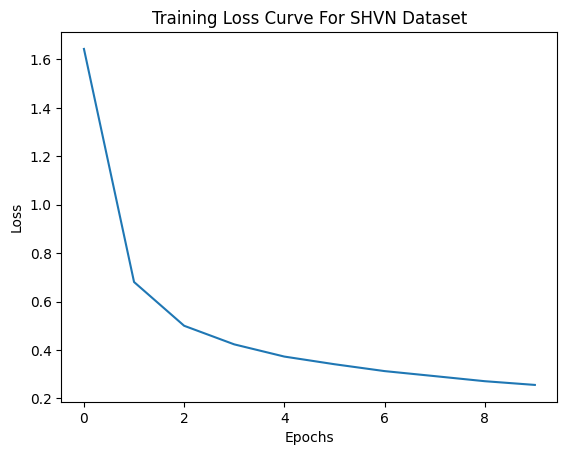

In [ ]:
# Visualization graphs

# Graph representing training loss for 10 epochs

plt.plot(train_loss_vals_shvn, label = 'Training Loss')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Providing the title for grah
plt.title('Training Loss Curve For SHVN Dataset')

plt.show()

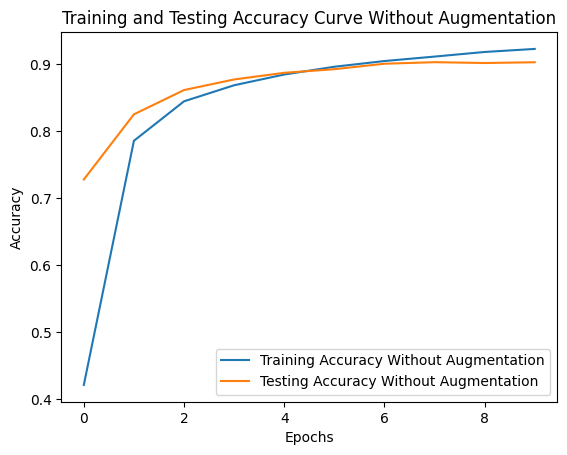

In [ ]:
# Graph representing training accuracy and testing accuracy for 20 epochs
plt.plot(train_accuracy_vals_shvn, label = 'Training Accuracy Without Augmentation')
plt.plot(test_accuracy_vals_shvn, label = 'Testing Accuracy Without Augmentation')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Testing Accuracy Curve Without Augmentation')

plt.legend()

plt.show()

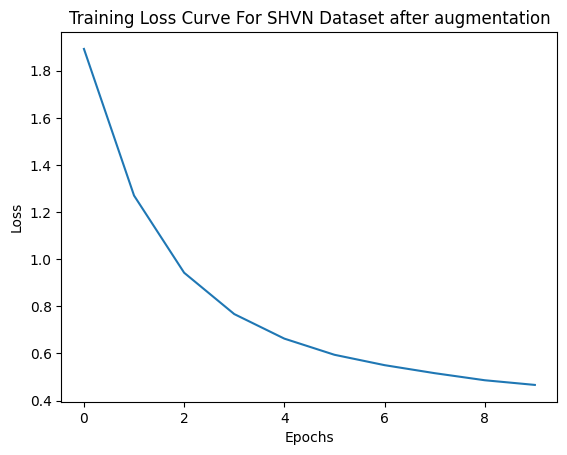

In [ ]:
# Visualization graphs

# Graph representing training loss for 10 epochs

plt.plot(train_loss_vals_shvn_aug, label = 'Training Loss after augmentation')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Providing the title for grah
plt.title('Training Loss Curve For SHVN Dataset after augmentation')

plt.show()

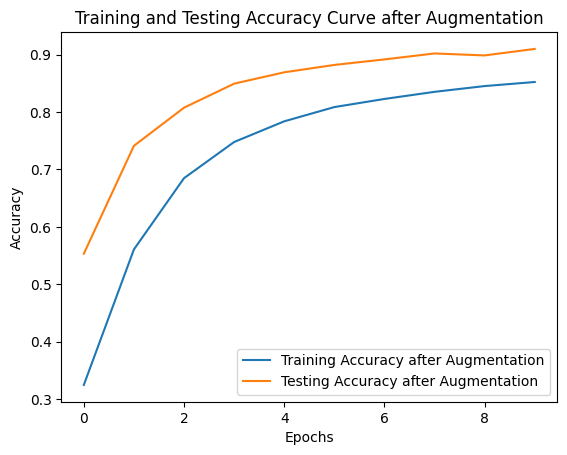

In [ ]:
# Graph representing training accuracy and testing accuracy for 20 epochs
plt.plot(train_accuracy_vals_shvn_aug, label = 'Training Accuracy after Augmentation')
plt.plot(test_accuracy_vals_shvn_aug, label = 'Testing Accuracy after Augmentation')

# Adding labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Providing the title for grah
plt.title('Training and Testing Accuracy Curve after Augmentation')

plt.legend()

plt.show()